In [349]:
import pandas as pd
import numpy as np

In [351]:
weather = pd.read_csv("local_weather.csv", index_col = "DATE")

In [353]:
weather

,STATION,NAME,ACMH,ACSH,AWND,FMTM,PGTM,PRCP,PSUN,SN32,...,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV01,WV20
DATE,,,,,,,,,,,,,,,,,,,,,
1990-01-01,USW00013722,"RALEIGH DURHAM INTERNATIONAL AIRPORT, NC US",40.0,30.0,14.54,1550.0,2.0,0.13,NaN,44.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-02,USW00013722,"RALEIGH DURHAM INTERNATIONAL AIRPORT, NC US",40.0,60.0,5.37,1450.0,1455.0,0.00,NaN,41.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,USW00013722,"RALEIGH DURHAM INTERNATIONAL AIRPORT, NC US",30.0,20.0,8.05,1450.0,1358.0,0.00,NaN,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,USW00013722,"RALEIGH DURHAM INTERNATIONAL AIRPORT, NC US",100.0,100.0,8.05,1551.0,1709.0,0.00,NaN,43.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,USW00013722,"RALEIGH DURHAM INTERNATIONAL AIRPORT, NC US",100.0,100.0,4.70,1150.0,1207.0,0.05,NaN,48.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-10,USW00013722,"RALEIGH DURHAM INTERNATIONAL AIRPORT, NC US",NaN,NaN,6.49,NaN,2236.0,0.04,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-11,USW00013722,"RALEIGH DURHAM INTERNATIONAL AIRPORT, NC US",NaN,NaN,10.74,NaN,1510.0,1.14,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-12,USW00013722,"RALEIGH DURHAM INTERNATIONAL AIRPORT, NC US",NaN,NaN,3.80,NaN,1144.0,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [355]:
weather.apply(pd.isnull).sum()/weather.shape[0]

STATION    0.000000
NAME       0.000000
ACMH       0.825958
ACSH       0.825958
AWND       0.000235
FMTM       0.376204
PGTM       0.440824
PRCP       0.000078
PSUN       0.999452
SN32       0.822120
SN33       0.819770
SN52       0.822355
SN53       0.822198
SNOW       0.000157
SNWD       0.000157
SX32       0.822120
SX33       0.819770
SX52       0.822433
SX53       0.822433
TAVG       0.455471
TMAX       0.000078
TMIN       0.000078
TSUN       0.752252
WDF1       0.825958
WDF2       0.174434
WDF5       0.176784
WDFG       0.827132
WESD       0.542257
WSF1       0.825958
WSF2       0.174434
WSF5       0.176784
WSFG       0.827132
WT01       0.483747
WT02       0.938592
WT03       0.881178
WT04       0.989583
WT05       0.971489
WT06       0.993264
WT07       0.994595
WT08       0.858855
WT09       0.995614
WT10       0.999922
WT11       0.998825
WT13       0.756168
WT14       0.947051
WT15       0.997494
WT16       0.725699
WT17       0.996005
WT18       0.986684
WT19       0.999530


In [357]:
core_weather = weather[["PRCP", "SNOW", "SNWD", "TMAX", "TMIN"]].copy()
core_weather.columns = ["precip", "snow", "snow_depth", "temp_max", "temp_min"]


In [359]:
core_weather.apply(pd.isnull).sum()

precip        1
snow          2
snow_depth    2
temp_max      1
temp_min      1
dtype: int64

In [361]:
del core_weather["snow"]

In [363]:
del core_weather["snow_depth"]

In [365]:
core_weather[pd.isnull(core_weather["precip"])]

,precip,temp_max,temp_min
DATE,,,
2024-12-14,NaN,NaN,NaN


In [367]:
core_weather.loc["2013-12-15",:]

precip       0.03
temp_max    54.00
temp_min    34.00
Name: 2013-12-15, dtype: float64

## Dealing with null values ##


In [369]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

precip      0.000078
temp_max    0.000078
temp_min    0.000078
dtype: float64

In [371]:
core_weather["precip"] = core_weather["precip"].fillna(0)

In [373]:
core_weather.apply(pd.isnull).sum()

precip      0
temp_max    1
temp_min    1
dtype: int64

In [375]:
core_weather[pd.isnull(core_weather["temp_min"])]

,precip,temp_max,temp_min
DATE,,,
2024-12-14,0.0,NaN,NaN


In [377]:
core_weather = core_weather.fillna(method = "ffill")

C:\Users\Ranjeet-PC\AppData\Local\Temp\ipykernel_23012\3177340214.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  core_weather = core_weather.fillna(method = "ffill")


In [379]:
core_weather.apply(pd.isnull).sum()

precip      0
temp_max    0
temp_min    0
dtype: int64

In [381]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

precip      0.0
temp_max    0.0
temp_min    0.0
dtype: float64

### verifying we have the correct data types

In [383]:
core_weather.dtypes

precip      float64
temp_max    float64
temp_min    float64
dtype: object

In [385]:
core_weather.index

Index(['1990-01-01', '1990-01-02', '1990-01-03', '1990-01-04', '1990-01-05',
       '1990-01-06', '1990-01-07', '1990-01-08', '1990-01-09', '1990-01-10',
       ...
       '2024-12-05', '2024-12-06', '2024-12-07', '2024-12-08', '2024-12-09',
       '2024-12-10', '2024-12-11', '2024-12-12', '2024-12-13', '2024-12-14'],
      dtype='object', name='DATE', length=12767)

In [387]:
core_weather.index = pd.to_datetime(core_weather.index)

In [389]:
core_weather.index

DatetimeIndex(['1990-01-01', '1990-01-02', '1990-01-03', '1990-01-04',
               '1990-01-05', '1990-01-06', '1990-01-07', '1990-01-08',
               '1990-01-09', '1990-01-10',
               ...
               '2024-12-05', '2024-12-06', '2024-12-07', '2024-12-08',
               '2024-12-09', '2024-12-10', '2024-12-11', '2024-12-12',
               '2024-12-13', '2024-12-14'],
              dtype='datetime64[ns]', name='DATE', length=12767, freq=None)

In [393]:
core_weather.apply(lambda x: (x==9999).sum())

precip      0
temp_max    0
temp_min    0
dtype: int64

 ### Analyzing our weather data

<Axes: xlabel='DATE'>

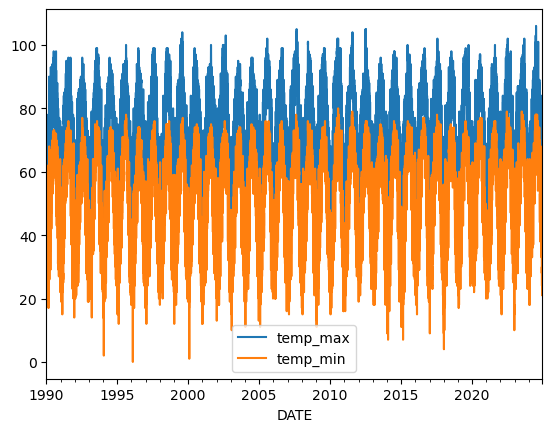

In [395]:
core_weather[["temp_max", "temp_min"]].plot()

<Axes: xlabel='DATE'>

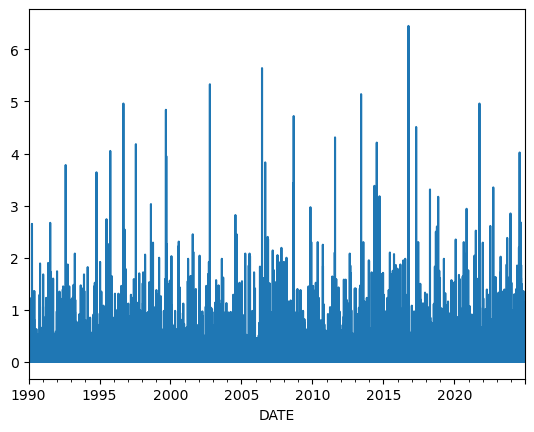

In [397]:
core_weather["precip"].plot()

<Axes: xlabel='DATE'>

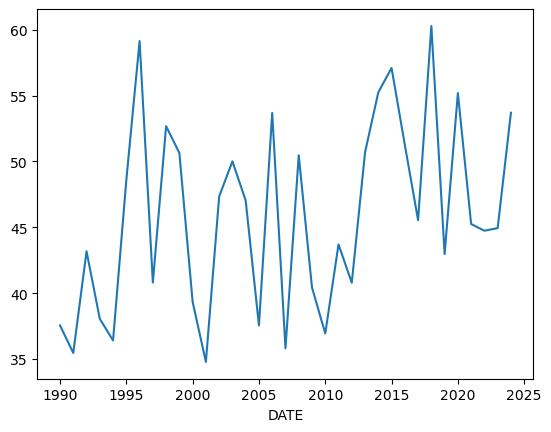

In [399]:
core_weather.groupby(core_weather.index.year).apply(lambda x: x["precip"].sum()).plot()

### Tranning first machine learning model

Predicting tommorow's tempurature using data from today

In [403]:
core_weather["target"] = core_weather.shift(-1)["temp_max"]

In [405]:
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1990-01-01,0.13,62.0,31.0,48.0
1990-01-02,0.00,48.0,22.0,58.0
1990-01-03,0.00,58.0,31.0,63.0
1990-01-04,0.00,63.0,44.0,61.0
1990-01-05,0.05,61.0,47.0,55.0
...,...,...,...,...
2024-12-10,0.04,69.0,55.0,84.0
2024-12-11,1.14,84.0,37.0,51.0
2024-12-12,0.00,51.0,32.0,58.0


In [407]:
core_weather = core_weather.iloc[:-2,:].copy()

In [409]:
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1990-01-01,0.13,62.0,31.0,48.0
1990-01-02,0.00,48.0,22.0,58.0
1990-01-03,0.00,58.0,31.0,63.0
1990-01-04,0.00,63.0,44.0,61.0
1990-01-05,0.05,61.0,47.0,55.0
...,...,...,...,...
2024-12-08,0.00,69.0,34.0,59.0
2024-12-09,0.37,59.0,48.0,69.0
2024-12-10,0.04,69.0,55.0,84.0


In [415]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha = .1)

In [417]:
predictors = ["precip", "temp_max", "temp_min"]

In [419]:
train = core_weather.loc[:"2020-12-31"]

In [421]:
test = core_weather.loc["2021-01-01":]

In [423]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [425]:
predictions = reg.predict(test[predictors])

In [479]:
from sklearn.metrics import mean_absolute_error

In [481]:
mean_absolute_error(test["target"], predictions)

5.454133637566913

### Evaluating our model


In [483]:
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis = 1)
combined.columns = ["actual", "predictions"]

In [485]:
combined

,actual,predictions
DATE,,
2021-01-01,57.0,56.797974
2021-01-02,55.0,58.542886
2021-01-03,49.0,56.717640
2021-01-04,48.0,52.582249
2021-01-05,51.0,50.986076
...,...,...
2024-12-08,59.0,67.235743
2024-12-09,69.0,61.536003
2024-12-10,84.0,70.776943


<Axes: xlabel='DATE'>

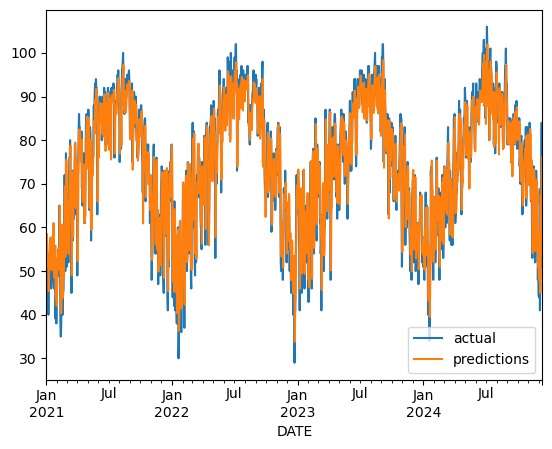

In [487]:
combined.plot()

In [489]:
reg.coef_

array([-1.85925406,  0.91919172,  0.06471672, 14.94191206,  0.30902004])

### creating a function to make predictions

In [491]:
core_weather["month_max"] = core_weather["temp_max"].rolling(30).mean()

In [493]:
core_weather

,precip,temp_max,temp_min,target,month_max,month_day_max,max_min
DATE,,,,,,,
1990-03-02,0.07,56.0,41.0,56.0,NaN,1.103571,1.365854
1990-03-03,0.61,56.0,42.0,54.0,NaN,1.097619,1.333333
1990-03-04,0.00,54.0,37.0,63.0,NaN,1.125926,1.459459
1990-03-05,0.00,63.0,30.0,72.0,NaN,0.959788,2.100000
1990-03-06,0.00,72.0,36.0,50.0,NaN,0.839352,2.000000
...,...,...,...,...,...,...,...
2024-12-08,0.00,69.0,34.0,59.0,61.000000,0.884058,2.029412
2024-12-09,0.37,59.0,48.0,69.0,60.700000,1.028814,1.229167
2024-12-10,0.04,69.0,55.0,84.0,60.800000,0.881159,1.254545


In [495]:
core_weather["month_max"] = core_weather["temp_max"].rolling(30).mean()

core_weather["month_day_max"] = core_weather["month_max"] / core_weather["temp_max"]

core_weather["max_min"] = core_weather["temp_max"] / core_weather["temp_min"]

In [497]:
core_weather = core_weather.iloc[30:,:].copy()

In [535]:


def create_predictions(predictors, core_weather, reg):
    # Split into train and test datasets
    train = core_weather.loc[:"2020-12-31"]
    test = core_weather.loc["2021-01-01":]

    # Handle NaN or infinite values in predictors
    train.loc[:, predictors] = train[predictors].replace([np.inf, -np.inf], np.nan)
    train = train.dropna(subset=predictors + ["target"])
    
    # Fit the model
    reg.fit(train[predictors], train["target"])
    predictions = reg.predict(test[predictors])
    
    # Calculate error
    error = mean_squared_error(test["target"], predictions)
    
    # Combine actual vs predictions
    combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ["actual", "predictions"]
    return error, combined


In [537]:
predictors = ["precip", "temp_max", "temp_min", "month_day_max", "max_min"]

error, combined = create_predictions(predictors, core_weather, reg)
error


C:\Users\Ranjeet-PC\AppData\Local\Temp\ipykernel_23012\4226367948.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.loc[:, predictors] = train[predictors].replace([np.inf, -np.inf], np.nan)


44.793270259863796

<Axes: xlabel='DATE'>

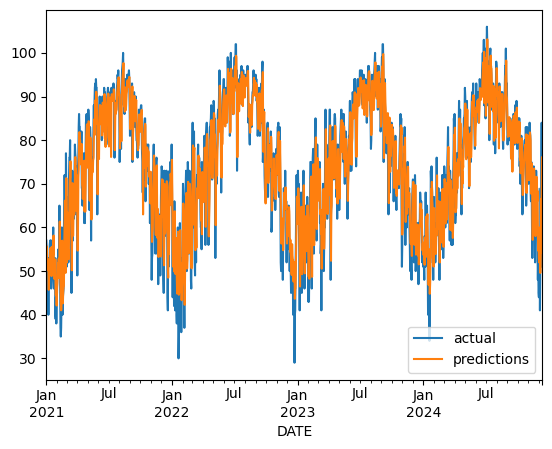

In [541]:
combined.plot()

In [557]:
core_weather["monthly_avg"] = (core_weather["temp_max"].groupby(core_weather.index.day_of_year).apply(lambda x: x.expanding(1).mean()).reset_index(level=0, drop= True))

In [559]:
core_weather

,precip,temp_max,temp_min,target,month_max,month_day_max,max_min,day_of_year_avg,monthly_avg
DATE,,,,,,,,,
1990-05-01,0.54,88.0,57.0,78.0,73.700000,0.837500,1.543860,88.000000,88.000000
1990-05-02,0.97,78.0,60.0,73.0,73.800000,0.946154,1.300000,78.000000,78.000000
1990-05-03,0.15,73.0,59.0,79.0,74.300000,1.017808,1.237288,73.000000,73.000000
1990-05-04,0.25,79.0,61.0,79.0,74.900000,0.948101,1.295082,79.000000,79.000000
1990-05-05,0.46,79.0,58.0,68.0,75.100000,0.950633,1.362069,79.000000,79.000000
...,...,...,...,...,...,...,...,...,...
2024-12-08,0.00,69.0,34.0,59.0,61.000000,0.884058,2.029412,54.942857,54.942857
2024-12-09,0.37,59.0,48.0,69.0,60.700000,1.028814,1.229167,55.000000,55.000000
2024-12-10,0.04,69.0,55.0,84.0,60.800000,0.881159,1.254545,54.857143,54.857143


In [561]:
core_weather["day_of_year_avg"] = (core_weather["temp_max"].groupby(core_weather.index.day_of_year).apply(lambda x: x.expanding(1).mean()).reset_index(level=0, drop= True))

In [ ]:
predictors = ["precip", "temp_max", "temp_min", "month_day_max", "max_min", "day_of_year_avg", "monthly_year"]

In [563]:
error, combined = create_predictions(predictors, core_weather, reg)
error

44.793270259863796

### Running Model Diagnostics

In [569]:
reg.coef_

array([-1.85498681,  0.91991649,  0.06435878, 14.95420745,  0.30895266])

In [571]:
core_weather.corr()["target"]

precip            -0.035059
temp_max           0.887679
temp_min           0.822519
target             1.000000
month_max          0.811196
month_day_max     -0.407314
max_min           -0.285807
day_of_year_avg    0.845253
monthly_avg        0.845253
Name: target, dtype: float64

In [573]:
combined["diff"] = (combined["actual"] - combined["predictions"]).abs()

In [581]:
combined.sort_values("diff", ascending = False).head(10)

,actual,predictions,diff
DATE,,,
2024-12-11,51.0,76.130708,25.130708
2022-12-23,29.0,51.850756,22.850756
2022-01-20,30.0,52.150076,22.150076
2022-05-07,53.0,75.037231,22.037231
2022-07-09,73.0,94.111374,21.111374
2021-02-27,77.0,55.891393,21.108607
2024-01-19,34.0,54.998173,20.998173
2022-09-22,75.0,95.604020,20.604020
2021-05-29,63.0,83.171211,20.171211
